In [4]:
using Pkg

Pkg.activate("../..")

projectdir_static = dirname(Base.active_project())

projectdirx(args...) = joinpath(projectdir_static, args...)

# Generate functions to access the path of default subdirectories.
for dir_type ∈ ("data", "src", "plots", "scripts", "papers")
    function_name = Symbol(dir_type * "dirx")
    @eval begin
        $function_name(args...) = projectdirx($dir_type, args...)
    end
end

using DrWatson

@quickactivate "GRNEvoContingencyAnalysis"

projectname()

  Activating project at `~/Documents/GRNEvoContingency`


  Activating project at `~/Documents/GRNEvoContingency/notebooks`


"GRNEvoContingencyAnalysis"

In [5]:
include(srcdirx("Evolution.jl"))
include(srcdirx("FitnessFunctions.jl"))
include(srcdirx("Visualization.jl"))
include(srcdirx("DynamicalClustering.jl"))

exp_name = "RE_Minimal_Inhibiting"

include(srcdirx("ExperimentSetups/Experiment_1/" * exp_name * ".jl"))

using JLD2
using CairoMakie
using ColorSchemes
using DynamicAxisWarping
using BenchmarkTools
using Distances
using StatsPlots
using Clustering
using MultivariateStats
using HypothesisTests
using PyCall

In [6]:
start_pos = rand(2)

epsilon = 1.

n_points = 10

point_positions = [start_pos]

function sample_circle(R,centre)

    r = R * sqrt(rand())
    theta = rand() * 2 * pi

    return [centre[1]+r*cos(theta),centre[2]+r*sin(theta)]

end

            



sample_circle (generic function with 1 method)

In [7]:
start_pos = rand(2)

epsilon = 0.2

n_points = 10

function generate_clique_cluster(start_pos,epsilon,n_points)

    point_positions = [start_pos]

    while length(point_positions) < n_points

        sample_point = sample_circle(epsilon,start_pos)

        valid = true

        for pp in point_positions
            if ((sample_point[1] - pp[1])^2 + (sample_point[2] - pp[2])^2) > epsilon
                valid = false
            end
        end

        if valid
            push!(point_positions,sample_point)
        end
    end

    return reduce(hcat,point_positions)

end

generate_clique_cluster (generic function with 1 method)

In [8]:
fig = CairoMakie.Figure(resolution = (1000,1000))
ax = Axis(fig[1,1]);

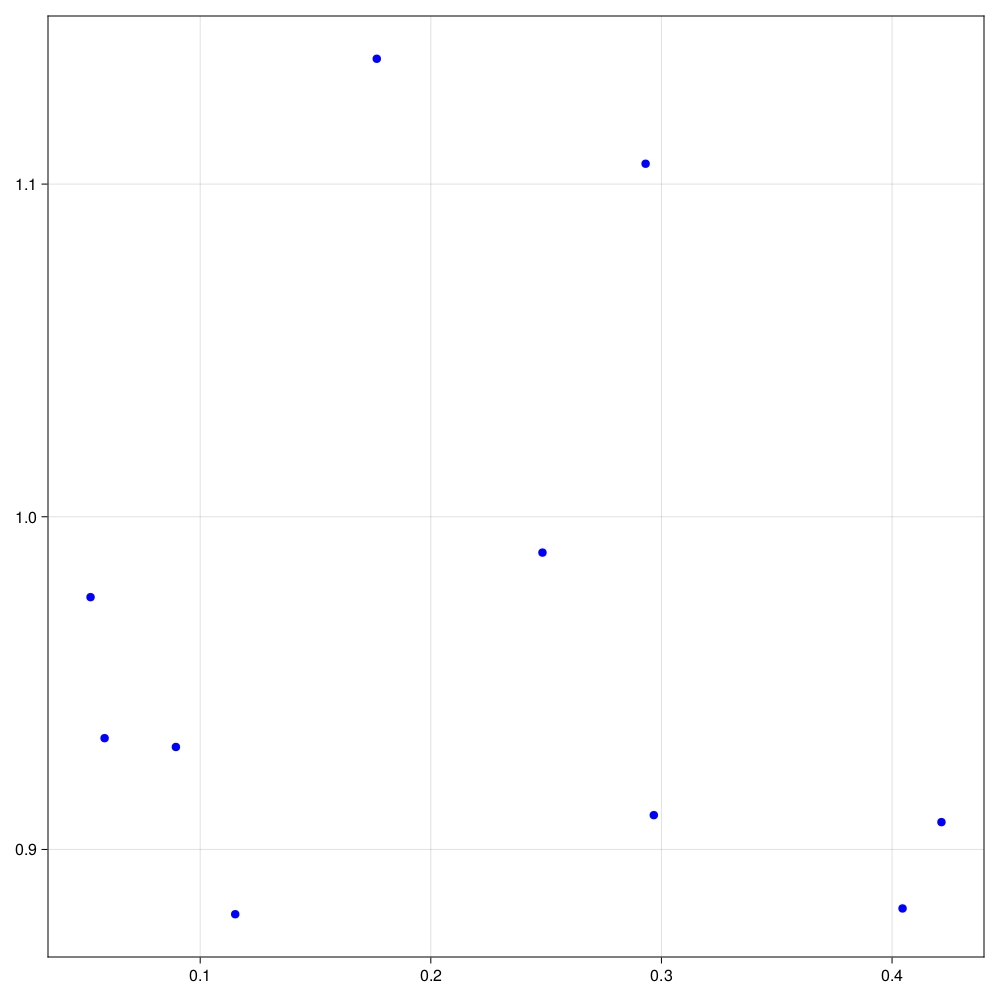

In [9]:
start_pos = rand(2)

epsilon = 0.2

point_positions = generate_clique_cluster(start_pos,epsilon,n_points)

CairoMakie.scatter!(ax,point_positions,color = :blue)

fig

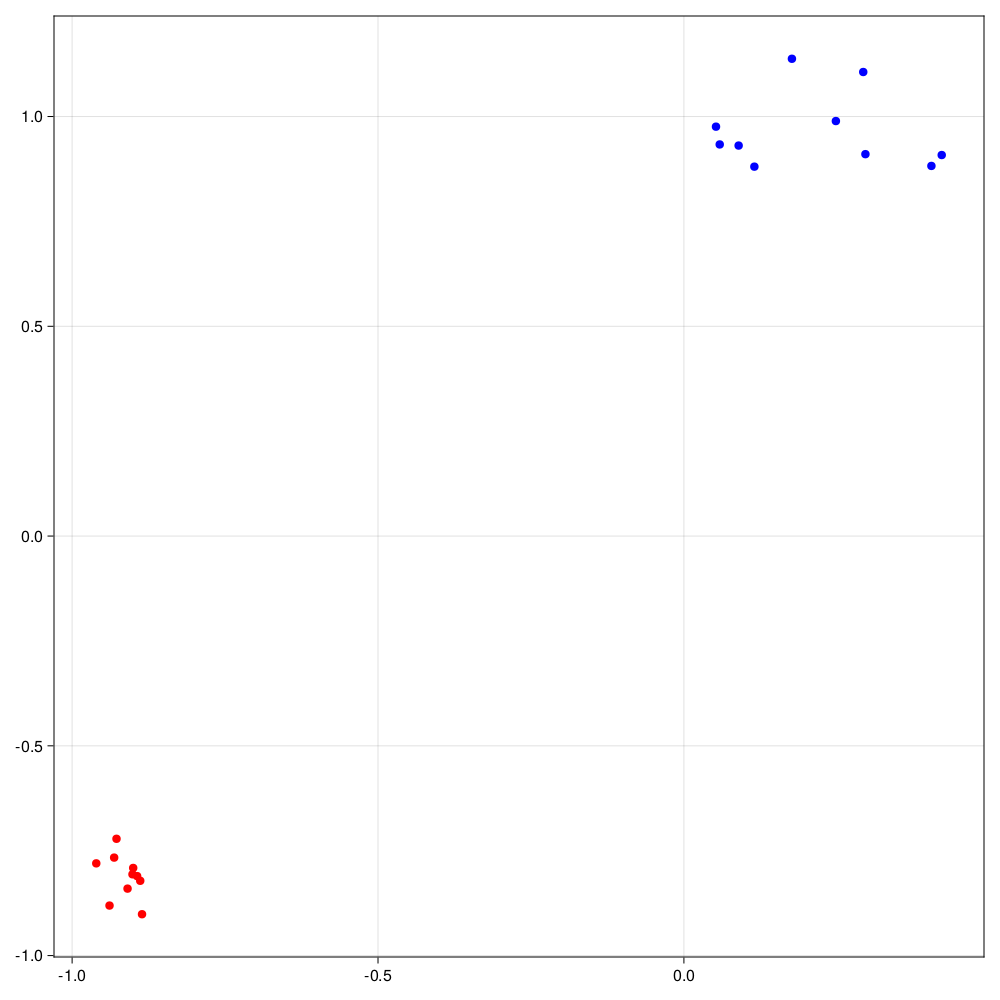

In [10]:
start_pos = -1*rand(2)

epsilon = 0.1

point_positions = generate_clique_cluster(start_pos,epsilon,n_points)

CairoMakie.scatter!(ax,point_positions,color = :red)

fig

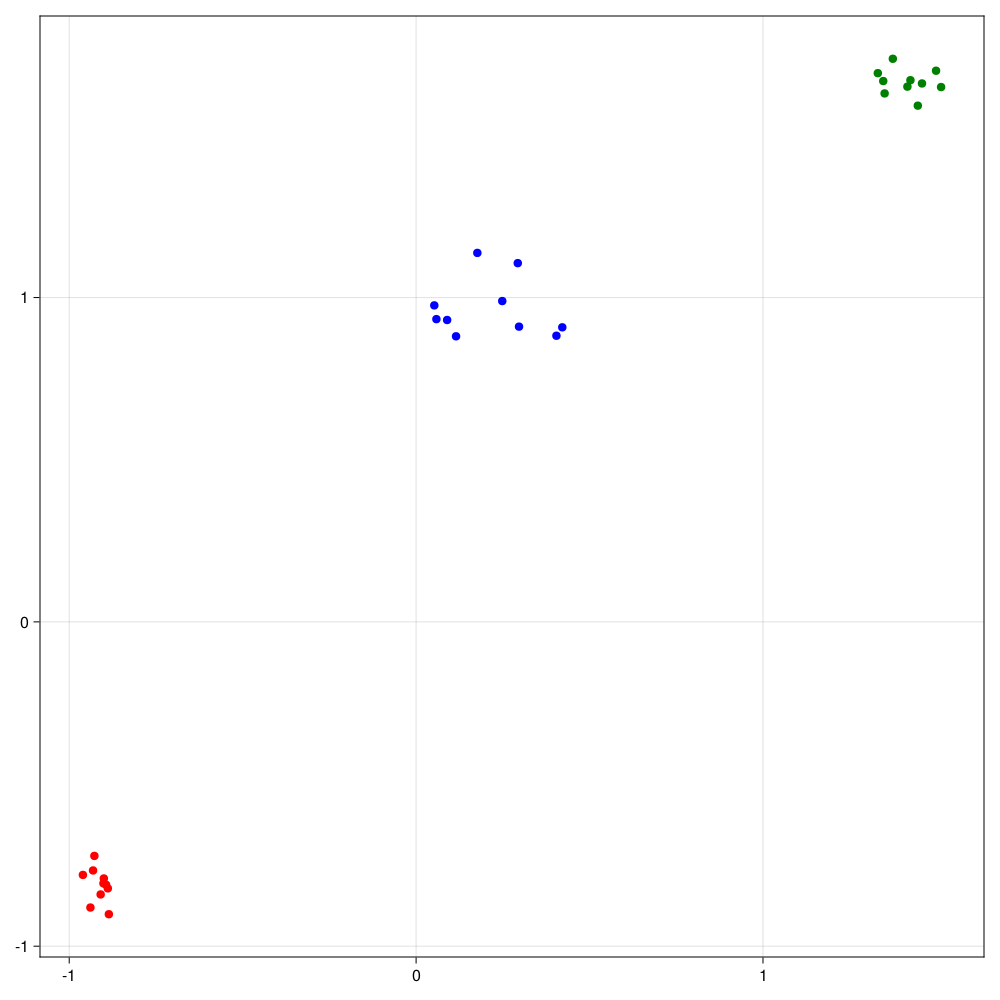

In [11]:
start_pos = 3*rand(2)

epsilon = 0.1

point_positions = generate_clique_cluster(start_pos,epsilon,n_points)

CairoMakie.scatter!(ax,point_positions,color = :green)

fig